#  Análisis de las Criptomonedas

En esta notebook vamos a esxplorar unos de los indicadores más importantes a las hora de hacer una inversión.

Indicators:
- ATR Average True Range
- Mooving Averages: 5, 15 and 30 period mooving average
- RSI Relative Strength Index

In [27]:
import numpy as np
import pandas as pd
import datetime as dt
# import plotly.graph_objects as go
#import time as t
from pycoingecko import CoinGeckoAPI
#import seaborn as sns
#import matplotlib.pyplot as plt
import mplfinance as fplt

In [28]:
cg = CoinGeckoAPI()

In [29]:
ohlc_data = cg.get_coin_ohlc_by_id(id = 'dash', vs_currency = 'usd', days = '180')

ohlc_data_frame = pd.DataFrame(data = ohlc_data, columns = ['Date', 'Open', 'High' ,'Low', 'Close'])

ohlc_data_frame['Date'] = ohlc_data_frame['Date'].apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y %H:%M:%S'))

ohlc_data_frame['Date'] = pd.to_datetime(ohlc_data_frame['Date'])

ohlc_data_frame = ohlc_data_frame.set_index('Date')

ohlc_data_frame['moneda'] = 'Monero'

ohlc_data_frame.head()


,Open,High,Low,Close,moneda
Date,,,,,
2023-02-18 21:00:00,73.10,73.10,72.19,72.19,Monero
2023-02-22 21:00:00,70.46,73.47,70.36,73.47,Monero
2023-02-26 21:00:00,71.13,74.14,69.39,74.14,Monero
2023-02-27 21:00:00,74.26,74.26,71.65,72.36,Monero
2023-03-06 21:00:00,69.29,69.29,62.51,62.51,Monero


In [30]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    return atr

In [31]:
ohlc_data_frame['ATR'] = atr(ohlc_data_frame)

In [32]:
ohlc_data_frame.tail()

,Open,High,Low,Close,moneda,ATR
Date,,,,,,
2023-08-02 21:00:00,31.69,31.89,31.67,31.89,Monero,2.556763
2023-08-06 21:00:00,31.31,32.40,30.82,32.40,Monero,2.486995
2023-08-10 21:00:00,32.44,32.93,32.33,32.33,Monero,2.352209
2023-08-14 21:00:00,32.48,32.48,31.95,31.95,Monero,2.222051
2023-08-18 21:00:00,29.84,29.84,29.84,29.84,Monero,2.214048


In [33]:
ohlc_data_frame['change'] = ohlc_data_frame['Close'].diff()
ohlc_data_frame['gain'] = ohlc_data_frame.change.mask(ohlc_data_frame.change < 0, 0.0)
ohlc_data_frame['loss'] = -ohlc_data_frame.change.mask(ohlc_data_frame.change > 0, -0.0)

#@numba.jit
def rma(x, n):
    """Running moving average"""
    a = np.full_like(x, np.nan)
    a[n] = x[1:n+1].mean()
    for i in range(n+1, len(x)):
        a[i] = (a[i-1] * (n - 1) + x[i]) / n
    return a

ohlc_data_frame['avg_gain'] = rma(ohlc_data_frame.gain.to_numpy(), 14)
ohlc_data_frame['avg_loss'] = rma(ohlc_data_frame.loss.to_numpy(), 14)

ohlc_data_frame['rs'] = ohlc_data_frame.avg_gain / ohlc_data_frame.avg_loss
ohlc_data_frame['RSI'] = 100 - (100 / (1 + ohlc_data_frame.rs))
ohlc_data_frame = ohlc_data_frame.drop(['change', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs'], axis=1)

In [34]:
ohlc_data_frame

,Open,High,Low,Close,moneda,ATR,RSI
Date,,,,,,,
2023-02-18 21:00:00,73.10,73.10,72.19,72.19,Monero,0.910000,NaN
2023-02-22 21:00:00,70.46,73.47,70.36,73.47,Monero,1.067143,NaN
2023-02-26 21:00:00,71.13,74.14,69.39,74.14,Monero,1.330204,NaN
2023-02-27 21:00:00,74.26,74.26,71.65,72.36,Monero,1.421618,NaN
2023-03-06 21:00:00,69.29,69.29,62.51,62.51,Monero,2.023645,NaN
2023-03-10 21:00:00,62.05,62.05,50.34,50.34,Monero,2.748385,NaN
2023-03-14 21:00:00,46.46,58.59,46.46,58.59,Monero,3.418500,NaN
2023-03-18 21:00:00,52.20,58.51,52.20,55.95,Monero,3.630750,NaN
2023-03-22 21:00:00,58.16,59.28,56.15,59.28,Monero,3.609268,NaN


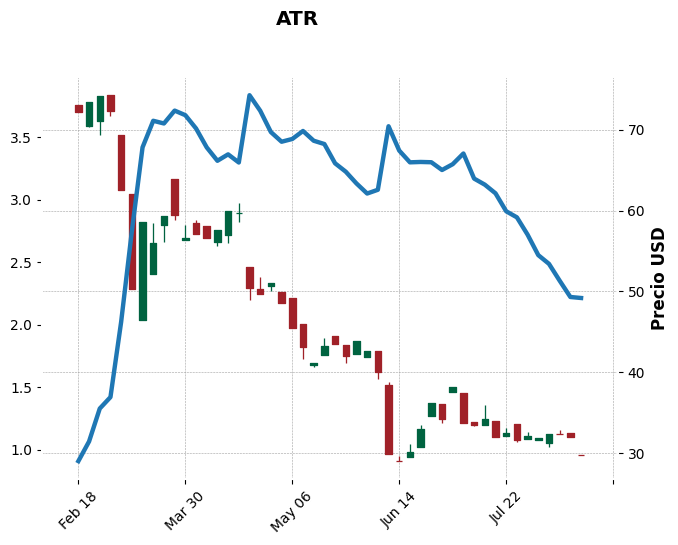

In [35]:
atr = fplt.make_addplot(ohlc_data_frame["ATR"])

fplt.plot(
            ohlc_data_frame,
            type='candle',
            addplot = atr,
            style='charles',
            title='ATR',
            ylabel='Precio USD',
            )

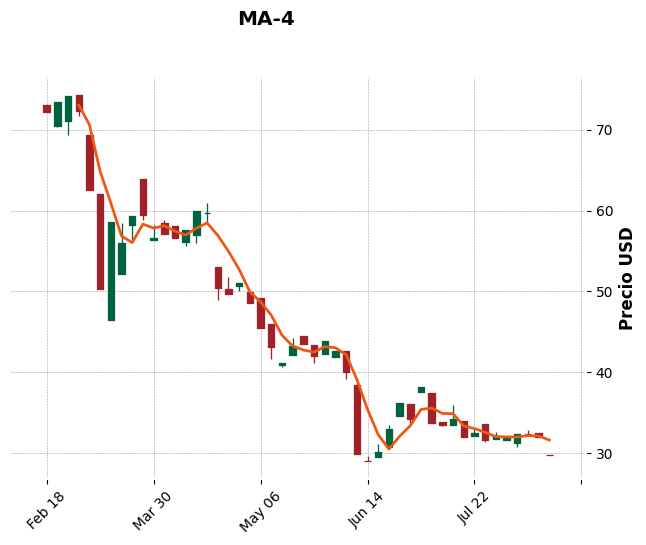

In [36]:
fplt.plot(
            ohlc_data_frame,
            type='candle',
            mav=4,
            style='charles',
            title='MA-4',
            ylabel='Precio USD',
            )

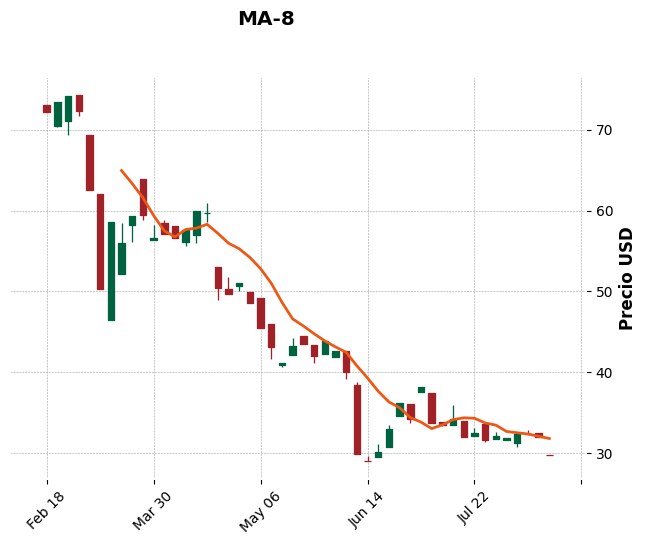

In [37]:
fplt.plot(
            ohlc_data_frame,
            type='candle',
            mav=8,
            style='charles',
            title='MA-8',
            ylabel='Precio USD',
            )

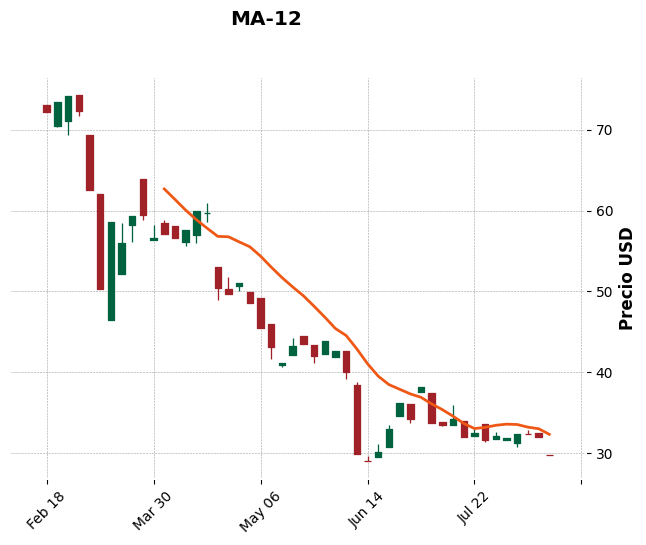

In [38]:
fplt.plot(
            ohlc_data_frame,
            type='candle',
            mav=12,
            style='charles',
            title='MA-12',
            ylabel='Precio USD',
            )

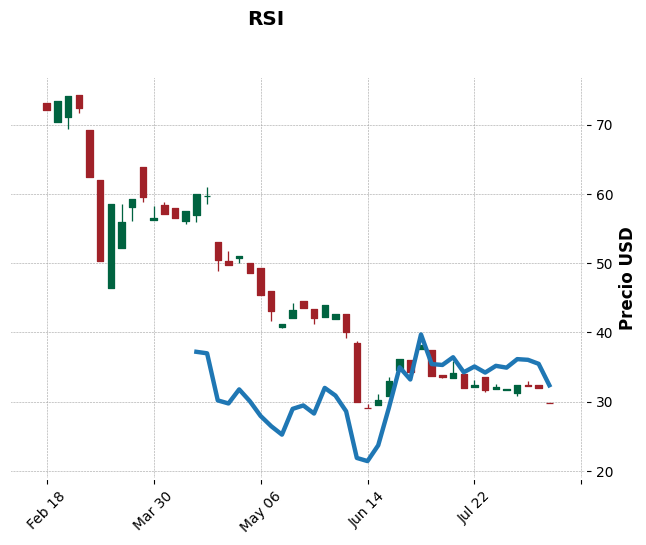

In [39]:
rsi = fplt.make_addplot(ohlc_data_frame["RSI"])

fplt.plot(
            ohlc_data_frame,
            type='candle',
            addplot = rsi,
            style='charles',
            title='RSI',
            ylabel='Precio USD',
            )